In [1]:
import PIL
import requests
import numpy as np
from io import BytesIO
from IPython.display import Image

import tensorflow as tf
from tensorflow.contrib.keras.python.keras import applications
from tensorflow.contrib.keras.python.keras.preprocessing import image
from tensorflow.contrib.keras.python.keras.applications import imagenet_utils

In [2]:
vgg16 = applications.VGG16(weights="imagenet")

In [3]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

We can see that the input needs to be `(224, 224, 3)`

Download an image resize it and drop to make it `224x224`

In [4]:
url = "https://media4.s-nbcnews.com/j/newscms/2016_36/1685951/ss-160826-twip-05_8cf6d4cb83758449fd400c7c3d71aa1f.nbcnews-ux-2880-1000.jpg"

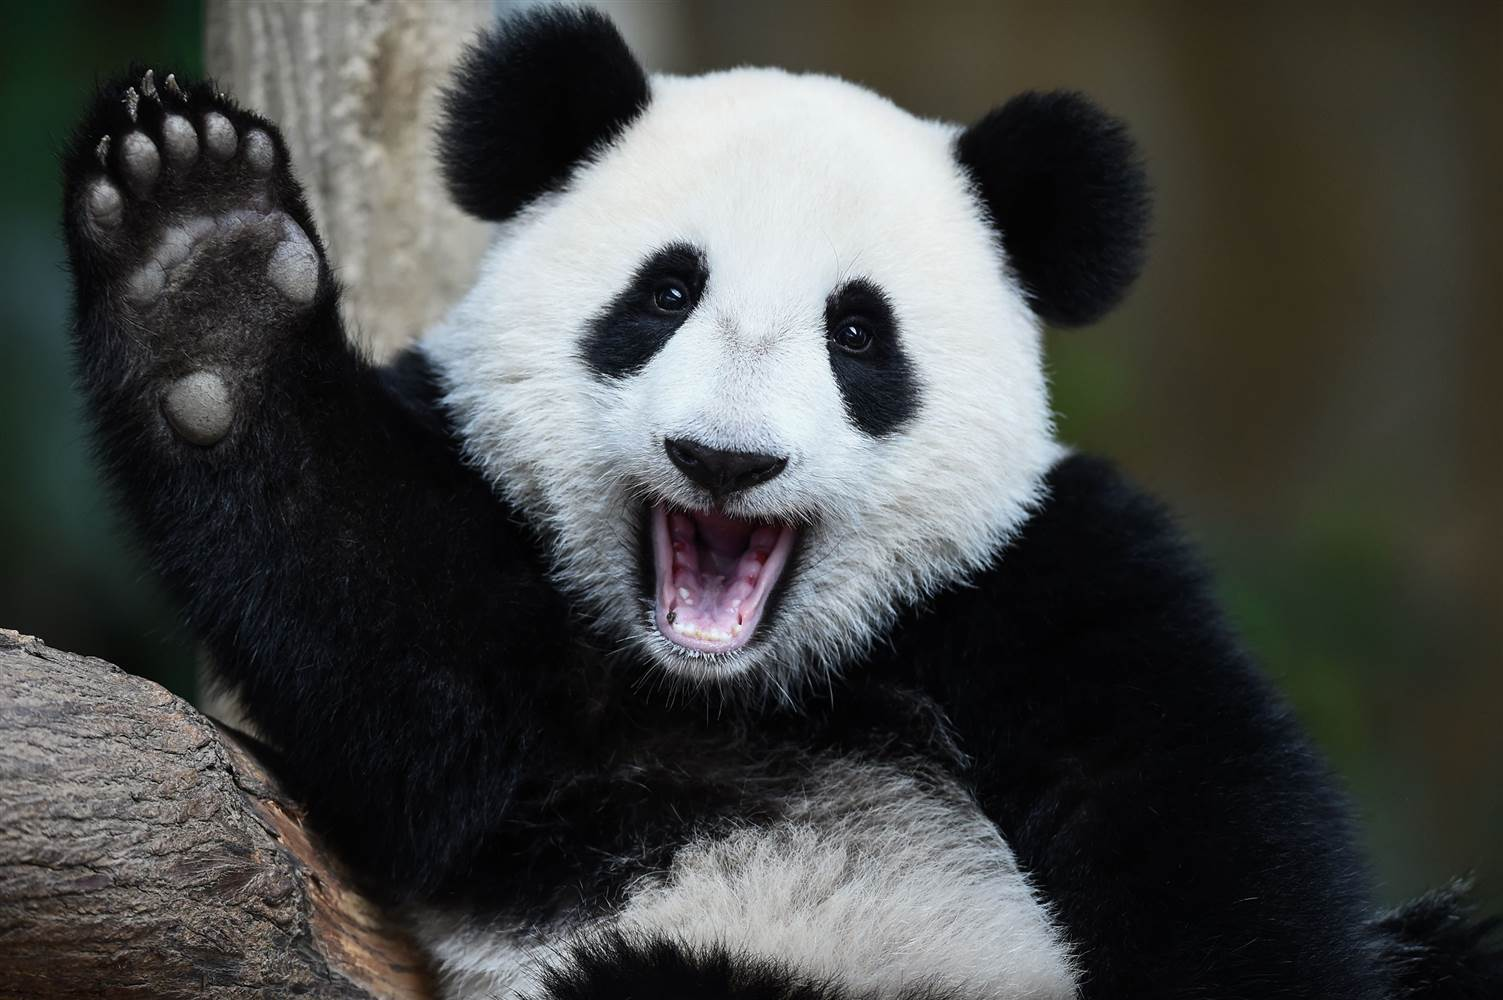

In [5]:
Image(url, width=224, height=224)

In [6]:
response = requests.get(url)

In [7]:
img = image.load_img(BytesIO(response.content), target_size=(224, 224))

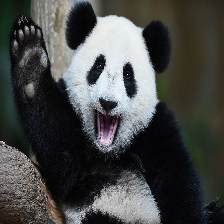

In [8]:
img

In [9]:
arr = image.img_to_array(img)

In [10]:
arr.shape

(224, 224, 3)

In [20]:
queries = np.expand_dims(arr, axis=0)

In [25]:
queries = imagenet_utils.preprocess_input(queries)

In [26]:
predictions = vgg16.predict(queries)

In [27]:
predictions[0, :5]

array([  1.83052880e-08,   4.50499016e-09,   1.94101601e-09,
         1.80873583e-09,   5.38723122e-10], dtype=float32)

In [28]:
imagenet_utils.decode_predictions(predictions)

[[('n02510455', 'giant_panda', 0.9932636),
  ('n04399382', 'teddy', 0.0040151305),
  ('n04254680', 'soccer_ball', 0.00096543791),
  ('n02500267', 'indri', 0.00023870298),
  ('n02133161', 'American_black_bear', 0.00011716313)]]